In [541]:
# 기본 모듈 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
import seaborn as sns

In [542]:
# 데이터 불러오기
stroke = pd.read_csv("./data/stroke.csv")

In [543]:
# 변수 이름 확인
print("stroke 데이터의 변수 확인: \n{}".format(stroke.keys()))

stroke 데이터의 변수 확인: 
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [544]:
print("뇌졸중 데이터의 형태 :{}".format(stroke.shape)) # 5110개의 데이터 포인트를 가지고 있고 특성은 12개

뇌졸중 데이터의 형태 :(5110, 12)


In [545]:
print("클래스 별 샘플개수:\n{}".format(
    {n: v for n, v in zip(['not stroke', 'stroke'], np.bincount(stroke["stroke"]))})) # 5110개의 데이터 포인터 중 4861개는 뇌졸중이 아닌 정상이고, 249는 뇌졸중환자입니다.

클래스 별 샘플개수:
{'not stroke': 4861, 'stroke': 249}


In [546]:
stroke["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [547]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [548]:
# id는 삭제
stroke.drop("id", axis=1, inplace=True)

In [549]:
stroke["gender"].value_counts()
# Other은 삭제

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [550]:

stroke=stroke[stroke["gender"]!="Other"] # gender에서 Other인 칼럼은 제외하고 할당한다.

In [551]:
# gender는 2개의 범주로 나뉘어져 있으므로 LabelEncoder()
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
Label_Encoder.fit(stroke["gender"])
stroke["gender"]=Label_Encoder.transform(stroke["gender"])

In [552]:
stroke["gender"].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5109, dtype: int64>

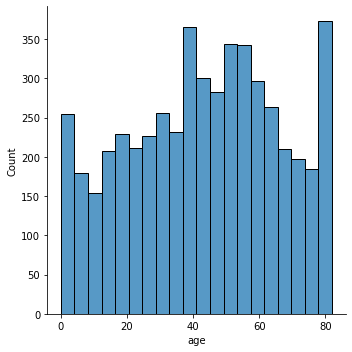

In [553]:
# age 칼럼의 분포를 살펴 보도록한다. 
sns.displot(stroke['age'],bins=20)
plt.show() # 분포의 치우침이 없이 대체로 양 끝구간의 분포가 크기는 하지만 이정도면 괜찮은 분포라고 생각하여 그대로 쓰기로 하였다.

In [554]:
# hypertension 칼럼은 범주화 된 것 같다.(2개)
stroke["hypertension"].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [555]:
# ever_married 칼럼을 살펴보자. Yes, No 두가지 범주로 나누어져 있기 때문에 LabelEncoding()을 진행해 주도록한다.
stroke["ever_married"].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [556]:
# gender는 2개의 범주로 나뉘어져 있으므로 LabelEncoder()
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
Label_Encoder.fit(stroke["ever_married"])
stroke["ever_married"]=Label_Encoder.transform(stroke["ever_married"])

In [557]:
stroke["ever_married"].value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

In [558]:
# work_type 칼럼은 5개의 범주를 갖고 있음을 알 수 있다. OneHotEncoding을 해주도록 한다.
stroke["work_type"].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [559]:
stroke = pd.concat([stroke,pd.get_dummies(stroke["work_type"])], axis =1 )

In [560]:
# work_type 칼럼은 삭제
stroke.drop("work_type",axis=1, inplace=True)

In [561]:
stroke

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
0,1,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,0,0,1,0,0
1,0,61.0,0,0,1,Rural,202.21,NaN,never smoked,1,0,0,0,1,0
2,1,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,0,0,1,0,0
3,0,49.0,0,0,1,Urban,171.23,34.4,smokes,1,0,0,1,0,0
4,0,79.0,1,0,1,Rural,174.12,24.0,never smoked,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Urban,83.75,NaN,never smoked,0,0,0,1,0,0
5106,0,81.0,0,0,1,Urban,125.20,40.0,never smoked,0,0,0,0,1,0
5107,0,35.0,0,0,1,Rural,82.99,30.6,never smoked,0,0,0,0,1,0
5108,1,51.0,0,0,1,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,0


In [562]:
# Residence_type
stroke["Residence_type"].value_counts()

from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
Label_Encoder.fit(stroke["Residence_type"])
stroke["Residence_type"]=Label_Encoder.transform(stroke["Residence_type"])

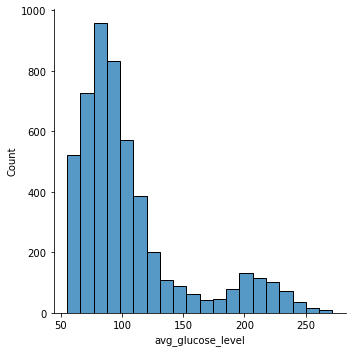

In [563]:
# avg_glucose_level 칼럼은 왼쪽에 데이터가 치우쳐진 오른쪽으로 꼬리가 긴 분포이다. 
sns.displot(stroke['avg_glucose_level'],bins=20)
plt.show()

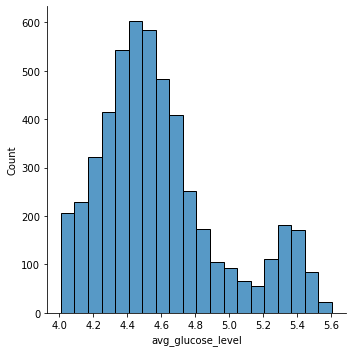

In [564]:
# 로그변환을 해준 후의 히스토 그램은 봉우리가 두개 생기긴 했지만, 처음의 분포보다는 나아졌다는 것을 볼 수 있다.
stroke['avg_glucose_level'] = np.log(stroke['avg_glucose_level'])
sns.displot(stroke['avg_glucose_level'],bins=20)
plt.show()

In [565]:
# bmi 칼럼에는 결측치 처리를 해주어야 하는데, 평균으로 대체 해주도록 하겠다.
stroke["bmi"].isnull().sum()

201

In [566]:
stroke["bmi"]

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5109, dtype: float64

**bmi에 결측치가 있는 행을 없앴을때와, 결측치를 평균으로 대체 했을 때 2가지 경우 각각 모델학습을 해보도록 하겠다**

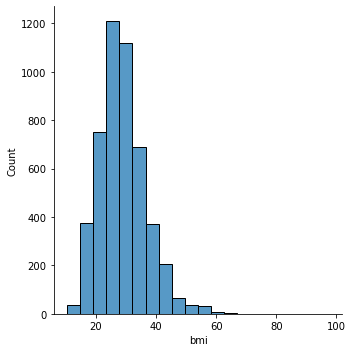

In [567]:
# 결측치에 대한 아무런 조치를 취하지 않고 히스토그램을 그렸을 때의 분포
sns.displot(stroke['bmi'],bins=20)
plt.show()

In [568]:
# 결측치를 제외한 bmi의 평균으로 bmi의 결측치를 대체
bmi_mean = 28.89
stroke2=stroke.fillna(bmi_mean)

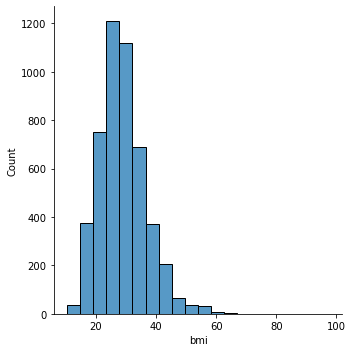

In [569]:
# 결측치를 제외하고 히스토그램을 그렸을 때의 분포 (위의 분포와 다른게 없어보인다.)
sns.displot(stroke.dropna(axis=0)['bmi'],bins=20)
plt.show()
stroke1=stroke.dropna(axis=0)

In [570]:
# smoking_status
stroke["smoking_status"].value_counts()
# 캐글에 확인 결과 Unknown은 환자가 흡연에 대한 정보를 획득하지 못했다고 설명되어있는데, 이에 해당되는 레코드가 1544개로 전체 레코드 중 30%에 해당 되는 양이다. 
# 이런 경우 이 칼럼을 삭제하고 모델링을 진행해보도록 하겠다.
stroke1 = stroke1.drop("smoking_status", axis=1)
stroke2 = stroke2.drop("smoking_status", axis=1)

In [571]:
# 훈련-테스트 셋으로 분리하기
X1 = stroke1.drop("stroke", axis=1)
y1 = stroke1["stroke"]

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,random_state=0)

In [572]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [573]:
knn.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=1)

In [574]:
y_pred1 = knn.predict(X_test1)
np.mean(y_pred1 == y_test1)

0.928280358598207

In [575]:
# 훈련-테스트 셋으로 분리하기
X2 = stroke2.drop("stroke", axis=1)
y2 = stroke2["stroke"]

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,random_state=0)

In [576]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [577]:
knn.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=1)

In [578]:
y_pred2 = knn.predict(X_test2)
np.mean(y_pred2 == y_test2)

0.9217527386541471

In [579]:
X_train1_scaled=X_train1.copy()
X_test1_scaled=X_test1.copy()
numeric_var = ['age', 'avg_glucose_level', 'bmi']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in numeric_var:
    scaler.fit(X_train1[numeric_var])
    X_train1_scaled[numeric_var]=scaler.transform(X_train1[numeric_var])
    X_test1_scaled[numeric_var]=scaler.transform(X_test1[numeric_var])

In [580]:
knn.fit(X_train1_scaled, y_train1)
y_pred1_scaled = knn.predict(X_test1_scaled)
np.mean(y_pred1_scaled == y_test1)

0.9315403422982885

In [581]:
X_train2_scaled=X_train2.copy()
X_test2_scaled=X_test2.copy()
numeric_var = ['age', 'avg_glucose_level', 'bmi']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in numeric_var:
    scaler.fit(X_train2[numeric_var])
    X_train2_scaled[numeric_var]=scaler.transform(X_train2[numeric_var])
    X_test2_scaled[numeric_var]=scaler.transform(X_test2[numeric_var])

In [582]:
knn.fit(X_train2_scaled, y_train2)
y_pred2 = knn.predict(X_test2_scaled)
np.mean(y_pred2 == y_test2)

0.9100156494522692

In [583]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train1,y_train1)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test1,y_test1)))

테스트 세트 정확도 : 0.96


In [584]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train2,y_train2)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test2,y_test2)))

테스트 세트 정확도 : 0.95


In [585]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train1_scaled,y_train1)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test1_scaled,y_test1)))

테스트 세트 정확도 : 0.96


In [586]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train2_scaled,y_train2)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test2_scaled,y_test2)))

테스트 세트 정확도 : 0.95
